<a href="https://colab.research.google.com/github/poojapandit963/patient_readmission_prediction_within_30_days_using_ai_ml/blob/main/project_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the csv
data=pd.read_csv("/content/drive/MyDrive/python_for_data_science/archive/diabetic_data.csv")

#displaying 1st 5 rows
data.head().T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                  NaN        NaN   
A1Cresult                                      NaN        NaN   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4  
encounter_id                        64410     500364      16680  
patient_nbr                      86047875   82442376   42519267  
race                      AfricanAmerican  Caucasian  Caucasian  
gender                             Female       Male       Male  
age                               [20-30)    [30-40)    [40-50)  
weight                                  ?          ?          ?  
admission_type_id                       1          1          1  
discharge_disposition_id                1          1          1  
admission_source_id                     7          7          7  
time_in_hospital                        2          2          1  
payer_c

In [ ]:
#shape of dataset
print(data.dtypes)
print(data.shape)


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
#1st data cleaning
#Checking for missing values in dataset('?')
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# gender was coded differently so we use a custom count for this one
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())

#dropping columns with large number of missing values
data = data.drop(['weight','payer_code','medical_specialty'],axis=1)

gender 3


In [ ]:
#dropping the rows where '?' appears
drop_Idx = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(data['diag_1'][data['diag_1'] == '?'].index))#dropping  rows with ? in diag_1 column
drop_Idx = drop_Idx.union(set(data['diag_2'][data['diag_2'] == '?'].index))#dropping  rows with ? in diag_2 column
drop_Idx = drop_Idx.union(set(data['diag_3'][data['diag_3'] == '?'].index))#dropping  rows with ? in diag_3 column
drop_Idx = drop_Idx.union(set(data['race'][data['race'] == '?'].index))#dropping  rows with ? in race column
drop_Idx = drop_Idx.union(set(data[data['discharge_disposition_id'] == 11].index))#dropping  rows with ? in discharge  column
drop_Idx = drop_Idx.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))#dropping  rows with invalid/unknown in gender column
new_Idx = list(set(data.index) - set(drop_Idx))
data = data.iloc[new_Idx]


In [ ]:
#2nd step removing garbage data
'''variables (drugs named citoglipton and examide), all records have the same value.
So essentially these cannot provide any interpretive or discriminatory information
for predicting readmission so we decided to drop these two variables'''
data=data.drop(['citoglipton','examide'],axis=1)
#Checking for missing values in dataset('?')
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

# gender was coded differently so we use a custom count for this one
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())

#now we have 0 missing values in our dataset

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [ ]:
#creating feature
#data integration
'''data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year.
 These are (crude) measures of how much hospital/clinic services a person has used in the past year.
We added these three to create a new variable called service utilization'''
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']


In [ ]:
'''Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates.
dataset contains 23 features for 23 drugs (or combos)
which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient.'''
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
data['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    data['numchange'] = data['numchange'] + data[colname]
    del data[colname]
'''For each medication listed in keys, the code creates a new temporary column by appending 'temp' to the medication name
 (e.g., 'metformin' becomes 'metformintemp').
For each of these temporary columns, a value of 0 is assigned if the medication status is 'No' or 'Steady', otherwise, it's assigned as 1.
 This effectively converts categorical medication change information into binary format indicating whether a change was made or not.'''
data['numchange'].value_counts()



numchange
0    70142
1    24922
2     1271
3      106
4        5
Name: count, dtype: int64

In [ ]:
print(data['numchange'].head(20))

1     1
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    2
13    0
14    0
15    1
16    0
17    0
18    0
22    0
23    0
Name: numchange, dtype: int64


In [ ]:
#reducintg the categories
# re-encoding admission type, discharge type and admission source into fewer categories
'''1,10: emergency, 2:urgent,3:elective,4:new born,5:trauma,9:elective procedure ,18:, 11:,etc'''
'''for example in admission_type_id, specific values in the discharge_disposition_id column are replaced to reduce the number of categories:
Values 6, 8, 9, 13 are replaced with 1.
Values 3, 4, 5, 14, 22, 23, 24 are replaced with 2.
Values 12, 15, 16, 17 are replaced with 10.
Values 25 and 26 are replaced with 18.'''
data['admission_type_id'] = data['admission_type_id'].replace(2,1)
data['admission_type_id'] = data['admission_type_id'].replace(7,1)
data['admission_type_id'] = data['admission_type_id'].replace(6,5)
data['admission_type_id'] = data['admission_type_id'].replace(8,5)

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(6,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(8,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(9,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(13,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(3,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(4,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(5,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(14,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(22,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(23,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(24,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(12,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(15,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(16,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(17,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(25,18)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(26,18)

data['admission_source_id'] = data['admission_source_id'].replace(2,1)
data['admission_source_id'] = data['admission_source_id'].replace(3,1)
data['admission_source_id'] = data['admission_source_id'].replace(5,4)
data['admission_source_id'] = data['admission_source_id'].replace(6,4)
data['admission_source_id'] = data['admission_source_id'].replace(10,4)
data['admission_source_id'] = data['admission_source_id'].replace(22,4)
data['admission_source_id'] = data['admission_source_id'].replace(25,4)
data['admission_source_id'] = data['admission_source_id'].replace(15,9)
data['admission_source_id'] = data['admission_source_id'].replace(17,9)
data['admission_source_id'] = data['admission_source_id'].replace(20,9)
data['admission_source_id'] = data['admission_source_id'].replace(21,9)
data['admission_source_id'] = data['admission_source_id'].replace(13,11)
data['admission_source_id'] = data['admission_source_id'].replace(14,11)

In [ ]:
#converting the datatpe from string to numeric
'''Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used.
To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature.
simply converting the datatype from string to binary numeric'''
#encoding certain categorical variables into binary numeric variables by converting their data types from strings to integers.
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] =data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

#We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.
#The A1C test measures the percentage of hemoglobin that has glucose attached to it.
#is a blood test used to measure the concentration of glucose in the bloodstream after a period of fasting.
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] =data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] =data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] =data['max_glu_serum'].replace('None', -99)

In [ ]:
'''we assume that age of the patient on average lies at the midpoint of the age category.
 For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years.
 So we converted age categories to midpoints, resulting in a numeric variable:'''
 # code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
data['age'].value_counts()

'''then replaces these interval strings in the 'age' column with numerical values ranging from 1 to 10, incrementing with each interval.
 For example, '[0-10)' is replaced with 1, '[10-20)' is replaced with 2, and so on.'''

"then replaces these interval strings in the 'age' column with numerical values ranging from 1 to 10, incrementing with each interval.\n For example, '[0-10)' is replaced with 1, '[10-20)' is replaced with 2, and so on."

In [ ]:
'''Multiple Encounters for same patient Some patients in the dataset had more than one encounter.
We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters.'''
#eg.Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
data2 = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

#before shape was (101766,50)
#now duplicates are removed from the dataset
data2.head().T

1                2          3          4  \
encounter_id                 149190            64410     500364      16680   
patient_nbr                55629189         86047875   82442376   42519267   
race                      Caucasian  AfricanAmerican  Caucasian  Caucasian   
gender                            0                0          1          1   
age                               2                3          4          5   
admission_type_id                 1                1          1          1   
discharge_disposition_id          1                1          1          1   
admission_source_id               7                7          7          7   
time_in_hospital                  3                2          2          1   
num_lab_procedures               59               11         44         51   
num_procedures                    0                5          1          0   
num_medications                  18               13         16          8   
number_outpatient                 0                2          0          0   
number_emergency                  0                0          0          0   
number_inpatient                  0                1          0          0   
diag_1                          276              648          8        197   
diag_2                       250.01              250     250.43        157   
diag_3                          255              V27        403        250   
number_diagnoses                  9                6          7          5   
max_glu_serum                   NaN              NaN        NaN        NaN   
A1Cresult                       NaN              NaN        NaN        NaN   
metformin                         0                0          0          0   
repaglinide                       0                0          0          0   
nateglinide                       0                0          0          0   
chlorpropamide                    0                0          0          0   
glimepiride                       0                0          0          0   
acetohexamide                     0                0          0          0   
glipizide                         0                1          0          1   
glyburide                         0                0          0          0   
tolbutamide                       0                0          0          0   
pioglitazone                      0                0          0          0   
rosiglitazone                     0                0          0          0   
acarbose                          0                0          0          0   
miglitol                          0                0          0          0   
troglitazone                      0                0          0          0   
tolazamide                        0                0          0          0   
insulin                           1                0          1          1   
glyburide-metformin               0                0          0          0   
glipizide-metformin               0                0          0          0   
glimepiride-pioglitazone          0                0          0          0   
metformin-rosiglitazone           0                0          0          0   
metformin-pioglitazone            0                0          0          0   
change                            1                0          1          1   
diabetesMed                       1                1          1          1   
readmitted                      >30               NO         NO         NO   
service_utilization               0                3          0          0   
numchange                         1                0          1          0   

                                  5  
encounter_id                  35754  
patient_nbr                82637451  
race                      Caucasian  
gender                            1  
age                               6  
admission_type_id                 1  
discharge_disposition_i

In [ ]:
data2.shape

(67580, 47)

In [ ]:
#The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.
data['readmitted'].value_counts()
#replacing the values with binary values
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [ ]:
''' The dataset contained up to three diagnoses for a given patient (primary, secondary and additional).
However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully.
Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset.
These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. '''
# Creating additional columns for diagnosis
'''Creating Additional Columns:

Additional columns are created to hold the original diagnosis codes.
Two new columns are created for each of the three diagnosis categories:
level1_diag1, level2_diag1, level1_diag2, level2_diag2, level1_diag3, and level2_diag3.
Filtering Diagnosis Codes:

Diagnosis codes starting with 'V' or 'E' typically represent factors influencing health status and encounters for circumstances other than diseases or injuries.
 These codes are often excluded from disease category analysis. So, all occurrences of 'V' or 'E' in the original diagnosis columns are replaced with 0 in the corresponding level1_diag and level2_diag columns.
Handling Missing Values:

Any remaining missing values (represented as '?') in the original diagnosis columns are replaced with -1 in the new level1_diag and level2_diag columns.
Data Type Conversion:

The data in the new level1_diag and level2_diag columns are con'''

data['level1_diag1'] = data['diag_1']
data['level2_diag1'] = data['diag_1']
data['level1_diag2'] = data['diag_2']
data['level2_diag2'] = data['diag_2']
data['level1_diag3'] = data['diag_3']
data['level2_diag3'] = data['diag_3']

data.loc[data['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
data.loc[data['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
data['level1_diag1'] = data['level1_diag1'].replace('?', -1)
data['level2_diag1'] = data['level2_diag1'].replace('?', -1)
data['level1_diag2'] = data['level1_diag2'].replace('?', -1)
data['level2_diag2'] = data['level2_diag2'].replace('?', -1)
data['level1_diag3'] = data['level1_diag3'].replace('?', -1)
data['level2_diag3'] = data['level2_diag3'].replace('?', -1)

data['level1_diag1'] = data['level1_diag1'].astype(float)
data['level2_diag1'] = data['level2_diag1'].astype(float)
data['level1_diag2'] = data['level1_diag2'].astype(float)
data['level2_diag2'] = data['level2_diag2'].astype(float)
data['level1_diag3'] =data['level1_diag3'].astype(float)
data['level2_diag3'] = data['level2_diag3'].astype(float)



In [ ]:

#By converting the specific diagnosis codes into broader disease categories,
#it reduces the complexity of the data while retaining important information related to disease types.
'''Looping Through Each Row:

The code iterates over each row in the DataFrame data using the iterrows() function.
Mapping Diagnosis Codes to Disease Categories:

For each row, it evaluates the diagnosis codes (level1_diag1, level1_diag2, level1_diag3) based on predefined ranges or specific values, mapping them to broader disease categories.
Each diagnosis code is categorized into one of the following disease categories:
1: Circulatory
2: Respiratory
3: Digestive
4: Diabetes
5: Injury
6: Musculoskeletal
7: Genitourinary
8: Neoplasms
0: Others (if not falling into any of the above categories)'''
def map_diagnosis_to_category(diagnosis):
    if (diagnosis >= 390 and diagnosis < 460) or (np.floor(diagnosis) == 785):
        return 1  # Circulatory
    elif (diagnosis >= 460 and diagnosis < 520) or (np.floor(diagnosis) == 786):
        return 2  # Respiratory
    elif (diagnosis >= 520 and diagnosis < 580) or (np.floor(diagnosis) == 787):
        return 3  # Digestive
    elif (np.floor(diagnosis) == 250):
        return 4  # Diabetes
    elif (diagnosis >= 800 and diagnosis < 1000):
        return 5  # Injury
    elif (diagnosis >= 710 and diagnosis < 740):
        return 6  # Musculoskeletal
    elif (diagnosis >= 580 and diagnosis < 630) or (np.floor(diagnosis) == 788):
        return 7  # Genitourinary
    elif (diagnosis >= 140 and diagnosis < 240):
        return 8  # Neoplasms
    else:
        return 0  # Others

for column in ['level1_diag1', 'level1_diag2', 'level1_diag3']:
    data[column] = data[column].apply(map_diagnosis_to_category)


In [ ]:
'''The code iterates over each row in the dataset (data) using iterrows().
For each row, it checks the value of level2_diag1, level2_diag2, and level2_diag3.
Based on the value of each diagnosis code, it maps it to one of the predefined disease categories. These categories seem to be defined based on ranges of diagnosis codes according to ICD-9-CM classification.
The mapped categories are then assigned to the respective columns (level2_diag1, level2_diag2, level2_diag3) in the dataset.'''
def map_to_category(diagnosis):
    if 390 <= diagnosis < 399:
        return 1
    elif 401 <= diagnosis < 415:
        return 2
    elif 415 <= diagnosis < 460:
        return 3
    elif np.floor(diagnosis) == 785:
        return 4
    elif 460 <= diagnosis < 489:
        return 5
    elif 490 <= diagnosis < 497:
        return 6
    elif 500 <= diagnosis < 520:
        return 7
    elif np.floor(diagnosis) == 786:
        return 8
    elif 520 <= diagnosis < 530:
        return 9
    elif 530 <= diagnosis < 544:
        return 10
    elif 550 <= diagnosis < 554:
        return 11
    elif 555 <= diagnosis < 580:
        return 12
    elif np.floor(diagnosis) == 787:
        return 13
    elif np.floor(diagnosis) == 250:
        return 14
    elif 800 <= diagnosis < 1000:
        return 15
    elif 710 <= diagnosis < 740:
        return 16
    elif 580 <= diagnosis < 630:
        return 17
    elif np.floor(diagnosis) == 788:
        return 18
    elif 140 <= diagnosis < 240:
        return 19
    elif 240 <= diagnosis < 280 and (np.floor(diagnosis) != 250):
        return 20
    elif (680 <= diagnosis < 710) or (np.floor(diagnosis) == 782):
        return 21
    elif 290 <= diagnosis < 320:
        return 22
    else:
        return 0

for col in ['level2_diag1', 'level2_diag2', 'level2_diag3']:
    data[col] = data[col].apply(map_to_category)


<ipython-input-19-cfa1324fec89>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-19-cfa1324fec89>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


<Axes: xlabel='count', ylabel='race'>

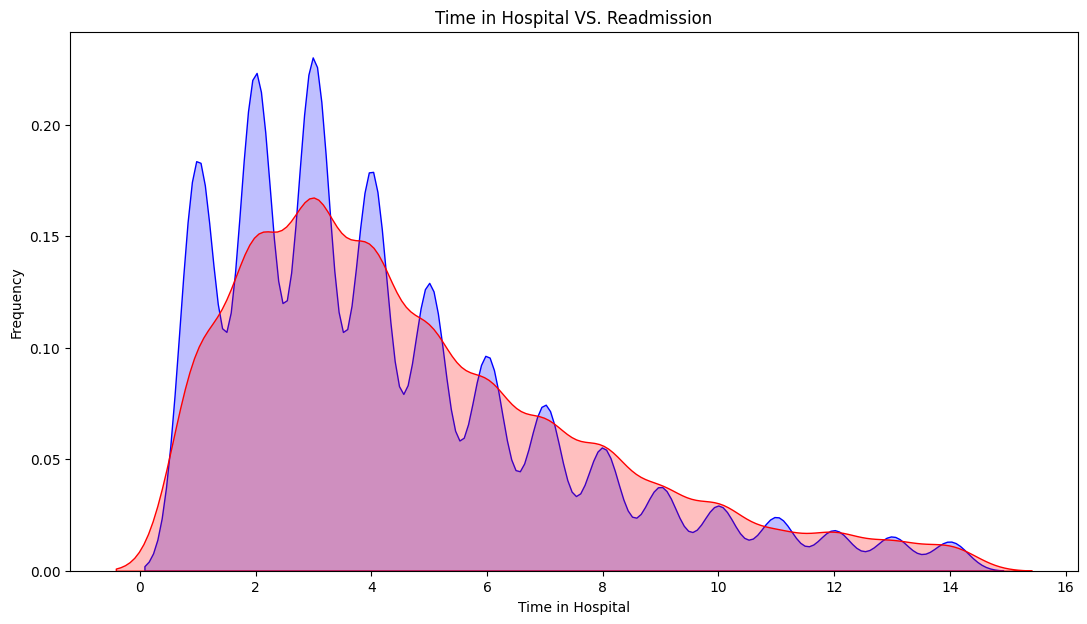

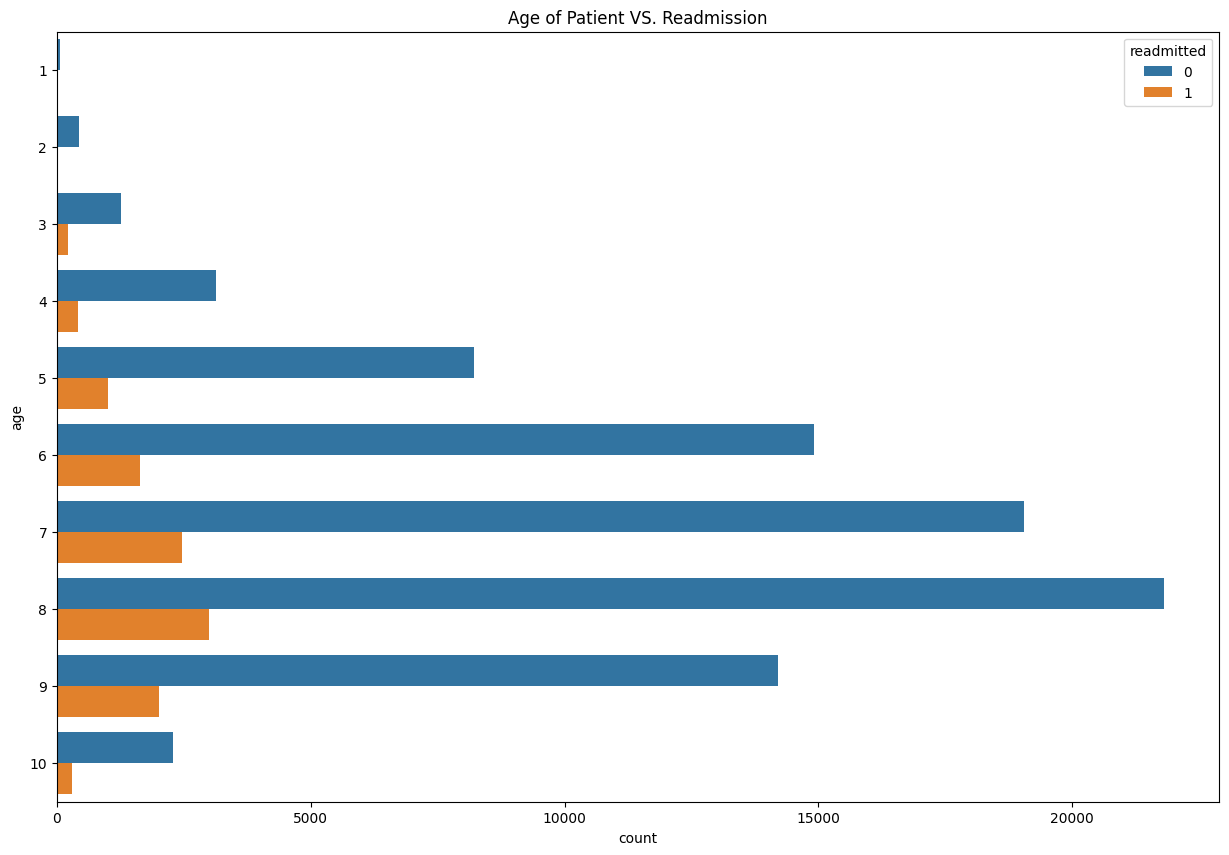

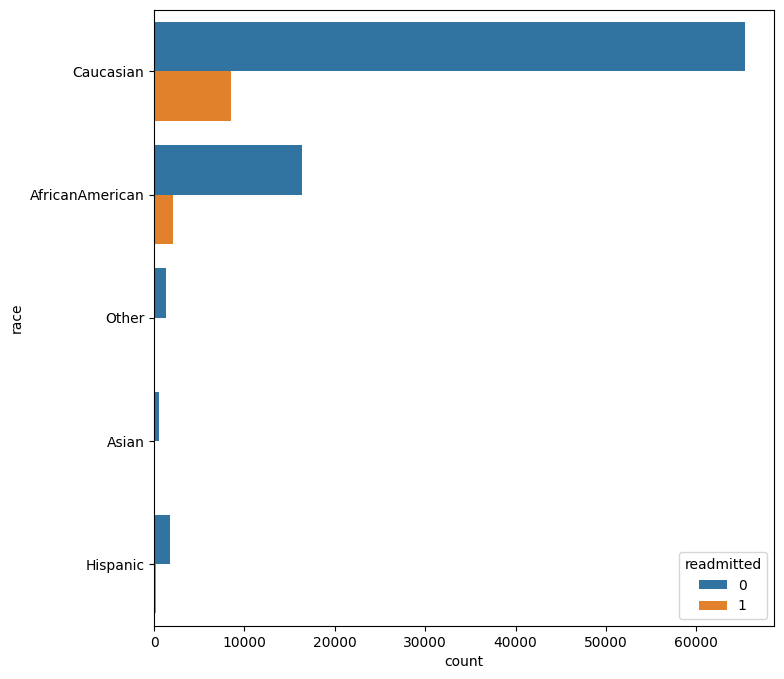

In [ ]:

#Time in Hospital and Readmission
#kernel density estimate plot to visualize the distribution of the time spent in the hospital for patients who were readmitted and those who were not.
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
#blue curve represents patients who were not readmitted, while the red curve represents those who were readmitted.

#Age and Readmission
#Each bar in the plot represents the count of patients in a specific age group, differentiated by their readmission status.
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')


#Ethnicity of patient and Readmission
#Each bar in the plot represents the count of patients in a specific ethnic group, differentiated by their readmission status.
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['race'], hue = data['readmitted'])


<ipython-input-24-d5c809f2365f>:30: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  change_counts_pivot.plot.pie(ax=ax, subplots=True, autopct='%1.1f%%', colors=['skyblue', 'salmon'])


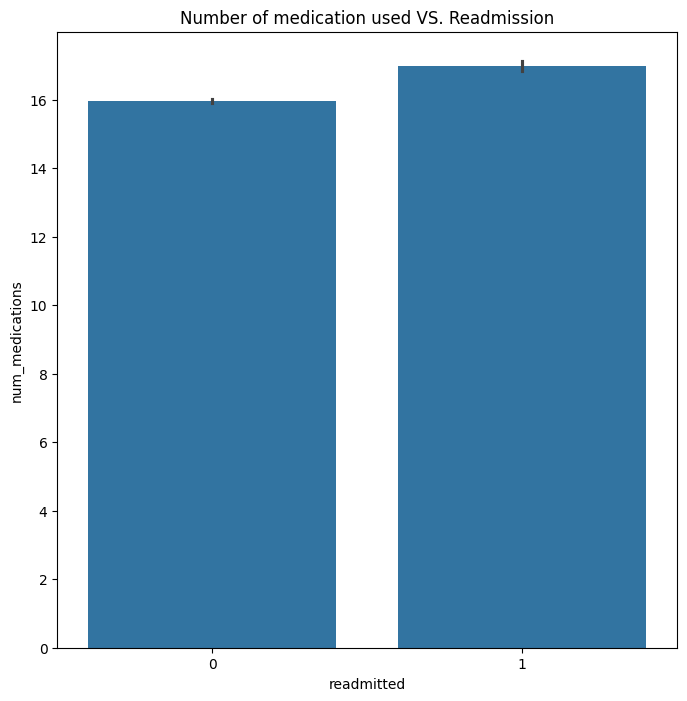

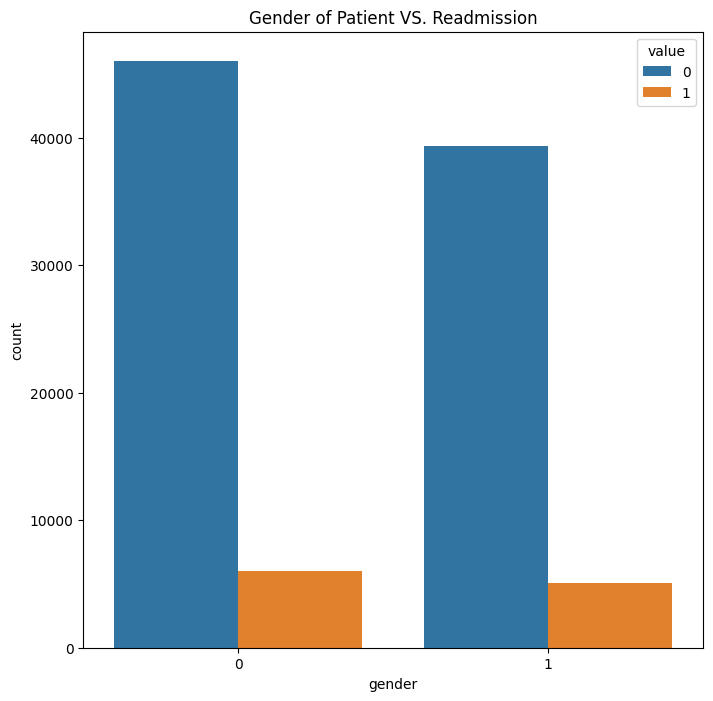

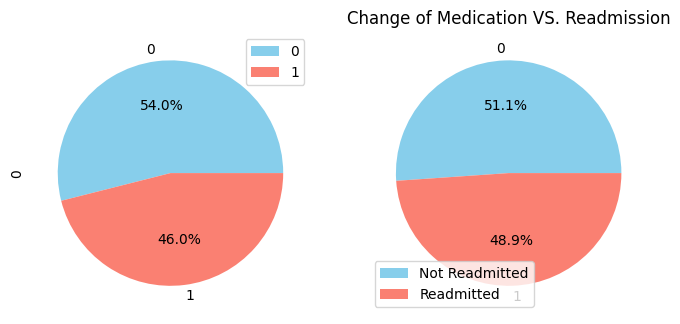

"A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.\n\n'>7' : 1\n'>8' : 1\nNorm : 0 = Normal\nNone : -99 = Test was not taken"

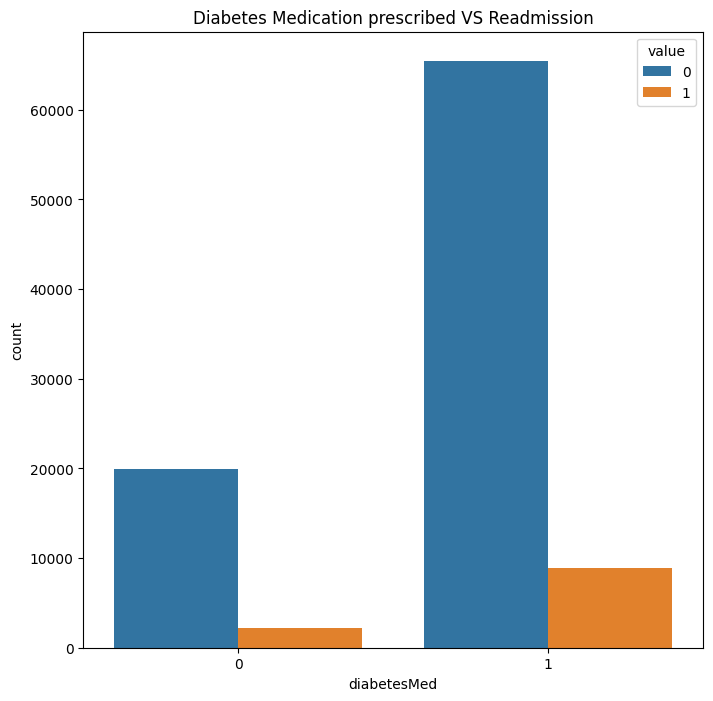

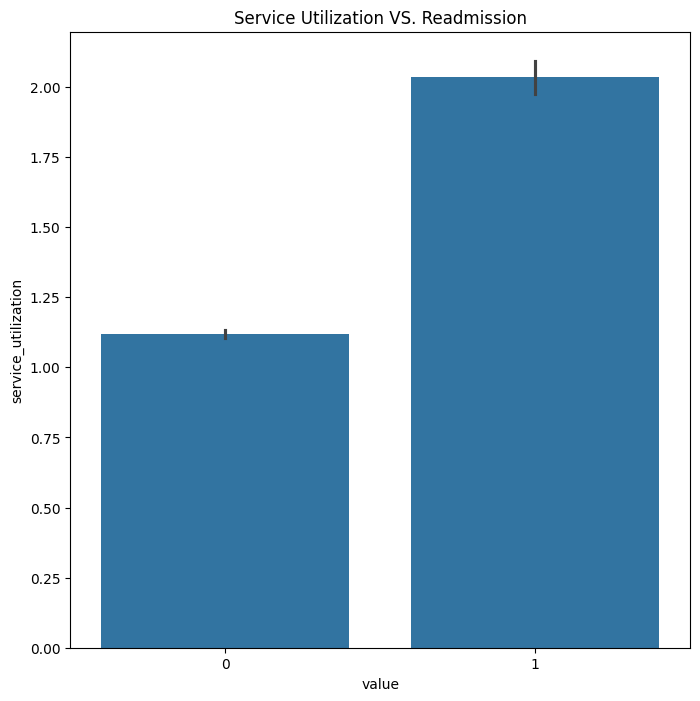

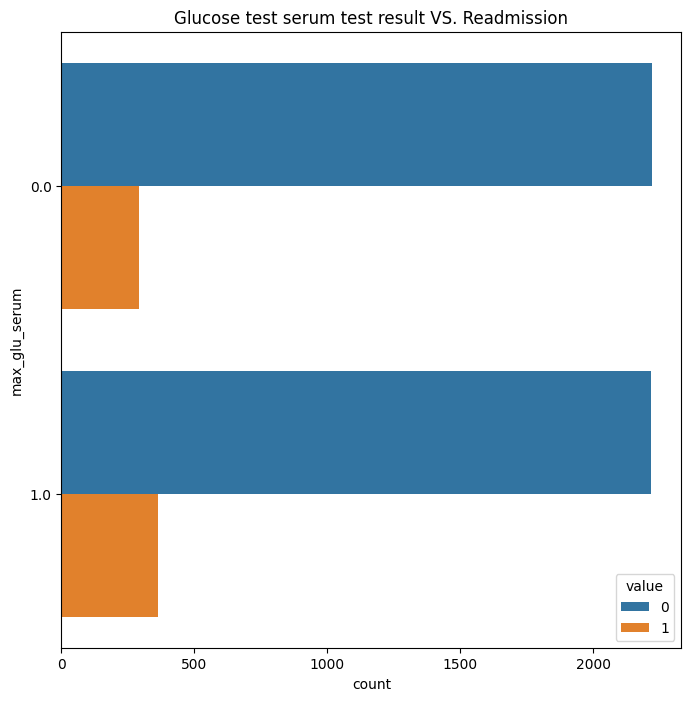

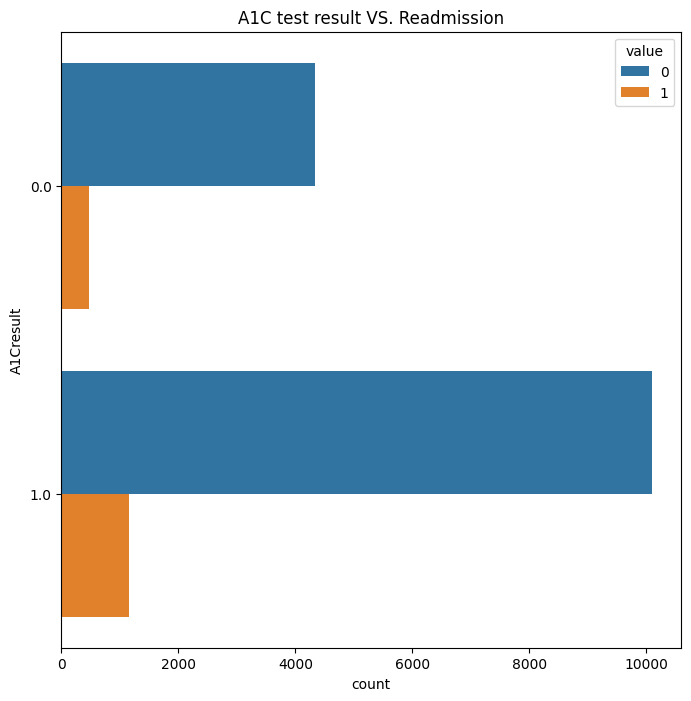

In [ ]:
#31
#bar plot showing the average number of medications used by patients who were readmitted and those who were not.
fig = plt.figure(figsize=(8,8))
sns.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")
#32
# Reshape the data to long-form
data_long_gender = pd.melt(data, id_vars=['gender'], value_vars=['readmitted'])

# Create the count plot
fig = plt.figure(figsize=(8,8))
sns.countplot(data=data_long_gender, x='gender', hue='value').set_title("Gender of Patient VS. Readmission")
'''Male = 1
Female = 0'''
#33
#count plot to visualize the distribution of medication change (whether medication was changed or not) for both readmitted and not readmitted patients.
# Reshape the data to long-form
data_long_chng_med = pd.melt(data, id_vars=['change'], value_vars=['readmitted'])

'''# Create the count plot
fig = plt.figure(figsize=(8,8))
sns.countplot(data=data_long_chng_med, x='change', hue='value').set_title('Change of Medication VS. Readmission')'''
# Calculate the count of each category
change_counts = data_long_chng_med.groupby(['change', 'value']).size().reset_index(name='count')

# Pivot the data to have 'change' as index and 'value' as columns
change_counts_pivot = change_counts.pivot(index='change', columns='value', values='count')

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
change_counts_pivot.plot.pie(ax=ax, subplots=True, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Change of Medication VS. Readmission')
plt.ylabel('')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

'''Change of Medication and Readmission¶
Change = 1
No Change = 0'''
#34
#count plot to visualize the distribution of whether diabetes medication was prescribed for both readmitted and not readmitted patients.
# Reshape the data to long-form
data_long_med = pd.melt(data, id_vars=['diabetesMed'], value_vars=['readmitted'])

# Create the count plot
fig = plt.figure(figsize=(8,8))
sns.countplot(data=data_long_med, x='diabetesMed', hue='value').set_title('Diabetes Medication prescribed VS Readmission')
'''Diabetes Medication prescribed and Readmission¶
Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
Values: “yes” : 1 “no” : 0'''
#35
#average service utilization (likely healthcare services utilized) for patients who were readmitted and those who were not.
# Reshape the data for service utilization
data_long_service = pd.melt(data, id_vars=['service_utilization'], value_vars=['readmitted'])

# Create the bar plot for service utilization
fig = plt.figure(figsize=(8, 8))
sns.barplot(data=data_long_service, y='service_utilization', x='value').set_title('Service Utilization VS. Readmission')

#36
#distribution of glucose test serum test results for both readmitted and not readmitted patients.
# Reshape the data for glucose test serum results
data_long_glu = pd.melt(data, id_vars=['max_glu_serum'], value_vars=['readmitted'])

# Create the count plot for glucose test serum results
fig = plt.figure(figsize=(8, 8))
sns.countplot(data=data_long_glu, y='max_glu_serum', hue='value').set_title('Glucose test serum test result VS. Readmission')
'''Glucose serum test result and Readmission¶
Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

'>200' : 1 = indicates diabetes
'>300' : 1 = Indicates diabetes
'Norm' : 0 = Normal
'None' : -99 = test was not taken'''
#37
#visualize the distribution of A1C test results for both readmitted and not readmitted patients.
# Reshape the data for A1C test results
data_long_a1c = pd.melt(data, id_vars=['A1Cresult'], value_vars=['readmitted'])

# Create the count plot for A1C test results
fig = plt.figure(figsize=(8, 8))
sns.countplot(data=data_long_a1c, y='A1Cresult', hue='value').set_title('A1C test result VS. Readmission')
'''A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

'>7' : 1
'>8' : 1
Norm : 0 = Normal
None : -99 = Test was not taken'''

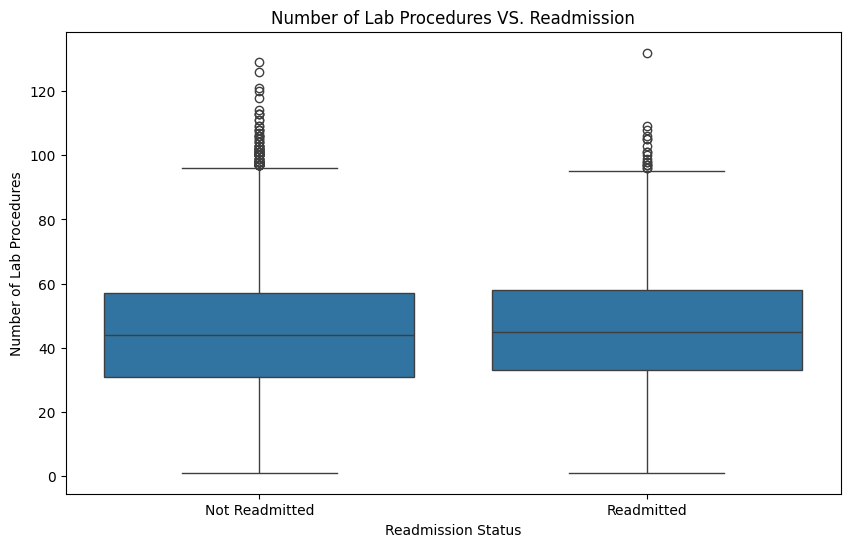

In [ ]:
#38
#number of laboratory procedures between patients who were readmitted and those who were not readmitted.
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=data)
plt.title('Number of Lab Procedures VS. Readmission')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Lab Procedures')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()



In [ ]:
#39
data['age'] = data['age'].astype('int64')
print(data.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
data['age'] = data.age.map(age_dict)
print(data.age.value_counts())

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [ ]:
#40
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

data[i] = data[i].astype('object')



In [ ]:
#41
data.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [ ]:
#42
data['nummed'] = 0

for col in keys:
    data['nummed'] = data['nummed'] + data[col]
data['nummed'].value_counts()

#43
# get list of only numeric features
#The resulting list num_col contains the names of all numeric columns in the DataFrame data, except for 'readmitted'.
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
num_col

['numchange',
 'num_procedures',
 'time_in_hospital',
 'num_lab_procedures',
 'number_diagnoses',
 'number_emergency',
 'number_inpatient',
 'num_medications',
 'service_utilization',
 'number_outpatient']

In [ ]:
#44 Descriptive analysis
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2
'''A DataFrame named statdataframe is created to store statistical information.
Empty lists are initialized to store skewness, kurtosis, standard deviation, whether log transformation is needed, and the type of log transformation for each numeric column.
For each numeric column i:
Skewness (skewval), kurtosis (kurtval), and standard deviation (sdval) are calculated.
If both skewness and kurtosis exceed the threshold of 2, log transformation is deemed necessary:
If the proportion of zero values in the column is less than or equal to 2%, log transformation is applied using np.log().
Otherwise, log1p transformation is applied using np.log1p().
Otherwise, no transformation is needed, and 'NA' is assigned to log_type.
The calculated values are appended to the corresponding lists.
The lists are added as columns to the statdataframe.'''
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = data[i].skew()
    skew_before.append(skewval)

    kurtval = data[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = data[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(data[data[i] == 0])/len(data) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(data[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(data[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(data[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(data[data[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

#45
statdataframe

numeric_column  skew_before  kurtosis_before  \
0            numchange     1.426548         1.451898   
1       num_procedures     1.313236         0.856100   
2     time_in_hospital     1.127510         0.839050   
3   num_lab_procedures    -0.240626        -0.253275   
4     number_diagnoses    -0.807741        -0.372558   
5     number_emergency    22.695921      1165.140400   
6     number_inpatient     3.566269        20.044813   
7      num_medications     1.339187         3.549325   
8  service_utilization     5.312374        67.194018   
9    number_outpatient     8.767489       146.244961   

   standard_deviation_before log_transform_needed log_type  skew_after  \
0                   0.488614                   No       NA    1.426548   
1                   1.703183                   No       NA    1.313236   
2                   2.982330                   No       NA    1.127510   
3                  19.656782                   No       NA   -0.240626   
4                   1.836659                   No       NA   -0.807741   
5                   0.948089                  Yes    log1p    3.614471   
6                   1.269975                  Yes    log1p    1.425127   
7                   8.072516                   No       NA    1.339187   
8                   2.315789                  Yes    log1p    1.097244   
9                   1.280061                  Yes    log1p    2.708627   

   kurtosis_after  standard_deviation_after  
0        1.451898                  0.488614  
1        0.856100                  1.703183  
2        0.839050                  2.982330  
3       -0.253275                 19.656782  
4       -0.372558                  1.836659  
5       15.854105                  0.318742  
6        1.319186                  0.513389  
7        3.549325                  8.072516  
8        0.497241                  0.665656  
9        7.648535                  0.432949

In [ ]:
#46
# performing the log transformation for the columns determined to be needing it above.
'''Iterate through each row of the statdataframe.
Check if the column needs a log transformation (log_transform_needed == 'Yes').
If a log transformation is needed:
Extract the column name (colname) from the current row.
If the transformation type is 'log':
Filter out rows where the column value is greater than 0 to avoid negative infinity values after transformation.
Create a new column in the DataFrame (colname + "_log") containing the result of applying np.log() to the column values.
If the transformation type is 'log1p':
Filter out rows where the column value is greater than or equal to 0.
Create a new column in the DataFrame (colname + "_log1p") containing the result of applying np.log1p() to the column values.'''
#This process ensures that the specified log transformations are applied to the respective columns in the DataFrame data,
#addressing skewness and kurtosis issues identified earlier.
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            data = data[data[colname] > 0]
            data[colname + "_log"] = np.log(data[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            data = data[data[colname] >= 0]
            data[colname + "_log1p"] = np.log1p(data[colname])


In [ ]:
#47
data = data.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)



In [ ]:
#48
data.shape

(96446, 54)

In [ ]:
#49
# get list of only numeric features
numerics = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
numerics

['numchange',
 'num_procedures',
 'time_in_hospital',
 'num_lab_procedures',
 'number_diagnoses',
 'service_utilization_log1p',
 'number_emergency_log1p',
 'number_inpatient_log1p',
 'num_medications',
 'number_outpatient_log1p']

In [ ]:
#50
# show list of features that are categorical
data.encounter_id = data.encounter_id.astype('int64')
data.patient_nbr = data.patient_nbr.astype('int64')
data.diabetesMed = data.diabetesMed.astype('int64')
data.change = data.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
data[i] = data[i].astype('object')

data.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
chlorpropamide                object
glimepiride                   object
acetohexamide                 object
glipizide                     object
glyburide                     object
tolbutamide                   object
p

In [ ]:
#51
datacopy = data.copy(deep = True)

#52
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x == 2 else x)

#53
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
data.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3'], axis=1, inplace=True)

#54
#This list interactionterms contains tuples representing pairs of features for which interaction terms will be created.
# Interaction terms are created by multiplying the values of the paired features.
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

#55
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    data[name] = data[inter[0]] * data[inter[1]]

#56
data[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()



num_medications  time_in_hospital  num_medications|time_in_hospital
1               18                 3                                54
2               13                 2                                26
3               16                 2                                32
4                8                 1                                 8
5               16                 3                                48

In [ ]:
#57
# Feature Scaling
#For each numeric feature, it computes its standard deviation and mean using the std() and mean() functions, respectively.
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: data[x].std())
datf['mean'] = datf['features'].apply(lambda x: data[x].mean())

In [ ]:
#58
# dropping multiple encounters while keeping either first or last encounter of these patients
data2 = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data2.shape
#It retains either the first or last encounter of these patients using the keep parameter in the drop_duplicates() function.


(67580, 55)

In [ ]:
#59 Data transformation
# standardize function
#Standardization involves subtracting the mean and then dividing by the standard deviation.
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))


In [ ]:
#60 normalization
#t applies the Z-score method to detect and remove outliers.
#Any data point beyond 3 standard deviations from the mean is considered an outlier.
data2[numerics] = standardize(data2[numerics])
import scipy as sp
data2 = data2[(np.abs(sp.stats.zscore(data2[numerics])) < 3).all(axis=1)]


<ipython-input-41-c81b4edc30e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[numerics] = standardize(data2[numerics])


In [ ]:
#61 feature extraction based on corrlation metric
#This visualization helps identify relationships between different variables in the dataset, with colors indicating the strength and direction of correlation.
from matplotlib.colors import ListedColormap
# Drop non-numeric columns
numeric_data = data2.drop(['patient_nbr', 'encounter_id'], axis=1)

# Convert categorical variables to one-hot encoding
encoded_data = pd.get_dummies(numeric_data)

# Compute correlation matrix
table = encoded_data.corr(method='pearson')
'''helps identify which variables are strongly correlated with each other. Strong positive or negative correlations may indicate relationships'''

# Visualize correlation matrix
table.style.background_gradient(cmap=my_cmap, axis=0)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
#62
'''it converts the 'level1_diag1' column to object type, possibly indicating categorical data.
It utilizes one-hot encoding (pd.get_dummies()) to convert categorical variables ('gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1') into binary vectors.
The drop_first=True parameter in pd.get_dummies() is used to drop the first category to avoid multicollinearity issues.
It also encodes the 'race' column into dummy variables and concatenates them with the original DataFrame.
Finally, it drops the original 'race' column to remove redundancy.'''
data2['level1_diag1'] = data2['level1_diag1'].astype('object')
data_pd = pd.get_dummies(data2, columns=['gender', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(data_pd['race'])
data_pd = pd.concat([data_pd, just_dummies], axis=1)
data_pd.drop(['race'], inplace=True, axis=1)
'''This step expands categorical variables into binary features, making them compatible with models that require numerical inputs.'''
#63
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

#64
num_cols = list(set(list(data._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['numchange',
 'num_lab_procedures',
 'num_medications|time_in_hospital',
 'diabetesMed',
 'time_in_hospital|num_lab_procedures',
 'service_utilization_log1p',
 'number_emergency_log1p',
 'num_medications|num_lab_procedures',
 'number_inpatient_log1p',
 'num_medications|num_procedures',
 'patient_nbr',
 'encounter_id',
 'change|num_medications',
 'num_procedures',
 'time_in_hospital',
 'number_diagnoses',
 'number_outpatient_log1p',
 'num_medications',
 'num_medications|numchange',
 'num_medications|number_diagnoses',
 'number_diagnoses|time_in_hospital']

In [ ]:
#65
new_non_num_cols = []
for i in non_num_cols:
    for j in data_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [ ]:
#66
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1.0',
 'A1Cresult_1.0',
 'level1_diag1_1',
 'level1_diag1_2',
 'level1_diag1_3',
 'level1_diag1_4',
 'level1_diag1_5',
 'level1_diag1_6',
 'level1_diag1_7',
 'level1_diag1_8']

In [ ]:
#67
l = []
for feature in list(data_pd.columns):
    if '|' in feature:
        l.append(feature)
l

#68
data_pd.head()

encounter_id  patient_nbr age  time_in_hospital  num_lab_procedures  \
1        149190     55629189  15         -0.444872            0.803605   
2         64410     86047875  25         -0.784109           -1.602060   
3        500364     82442376  35         -0.784109            0.051835   
4         16680     42519267  45         -1.123345            0.402661   
5         35754     82637451  55         -0.444872           -0.599700   

   num_procedures  num_medications  number_diagnoses metformin repaglinide  \
1       -0.816784         0.270081          0.881754         0           0   
2        2.026788        -0.335198         -0.704844         0           0   
3       -0.248070         0.027969         -0.175978         0           0   
4       -0.816784        -0.940477         -1.233711         0           0   
5        2.595502         0.027969          0.881754         0           0   

   ... level1_diag1_4 level1_diag1_5 level1_diag1_6 level1_diag1_7  \
1  ...          False          False          False          False   
2  ...          False          False          False          False   
3  ...          False          False          False          False   
4  ...          False          False          False          False   
5  ...          False          False          False          False   

  level1_diag1_8 AfricanAmerican  Asian Caucasian Hispanic  Other  
1          False           False  False      True    False  False  
2          False            True  False     False    False  False  
3          False           False  False      True    False  False  
4           True           False  False      True    False  False  
5          False           False  False      True    False  False  

[5 rows x 79 columns]

In [ ]:
#69
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9',
                 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1', 'level1_diag1_2', 'level1_diag1_3', 'level1_diag1_4',
                 'level1_diag1_5','level1_diag1_6', 'level1_diag1_7', 'level1_diag1_8']

In [ ]:
#70
X = data_pd[feature_set]
y = data_pd['readmitted']

# modelling

In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'admission_source_id_4', 'admission_source_id_7',
                 'admission_source_id_9',
                 'level1_diag1_1',
                 'level1_diag1_2',
                 'level1_diag1_3',
                 'level1_diag1_4',
                 'level1_diag1_5',
                 'level1_diag1_6',
                 'level1_diag1_7',
                 'level1_diag1_8']
#86
X = data_pd[feature_set_no_int]
y = data_pd['readmitted']

# modelling using logistic regression

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Check the distribution of classes in the original dataset
data_pd['readmitted'].value_counts()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Initialize Logistic Regression model with specified hyperparameters
logit = LogisticRegression(fit_intercept=True, penalty='l2', solver='lbfgs')

# Train the Logistic Regression model
logit.fit(X_train, y_train)

# Make predictions on the test set
logit_pred = logit.predict(X_test)

# Create a confusion matrix
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(logit_pred, name='Predict'), margins=True)

# Print original dataset shape before SMOTE
print('Original dataset shape {}'.format(Counter(y_train)))

'''Synthetic Minority Over-sampling Technique (SMOTE) is a popular technique used in the field of imbalanced learning to address the class imbalance problem.
it creates synthetic samples by interpolating between existing minority class instances, thus effectively expanding the minority class.
This approach helps to balance the class distribution and mitigate the effects of class imbalance on model training.'''
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)

# Print new dataset shape after SMOTE
print('New dataset shape {}'.format(Counter(train_output_new)))

# Convert resampled arrays into DataFrame
train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))

# Split the data into training and testing sets after SMOTE
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

# Initialize Logistic Regression model after SMOTE
logit = LogisticRegression(fit_intercept=True, penalty='l2')

# Train the Logistic Regression model after SMOTE
logit.fit(X_train, y_train)

# Make predictions on the test set after SMOTE
logit_pred = logit.predict(X_test)

# Calculate accuracy, precision, and recall after SMOTE
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

# Create a confusion matrix after SMOTE
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(logit_pred, name='Predict'), margins=True)

# Print accuracy, precision, and recall after SMOTE
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

# Store metrics after SMOTE in variables for later use
accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Original dataset shape Counter({0: 43711, 1: 4053})
New dataset shape Counter({0: 43711, 1: 43711})
Accuracy is 0.71
Precision is 0.72
Recall is 0.70
Accuracy is 0.71
Precision is 0.72
Recall is 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# modelling using random forest

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})
Accuracy is 0.92
Precision is 0.96
Recall is 0.89


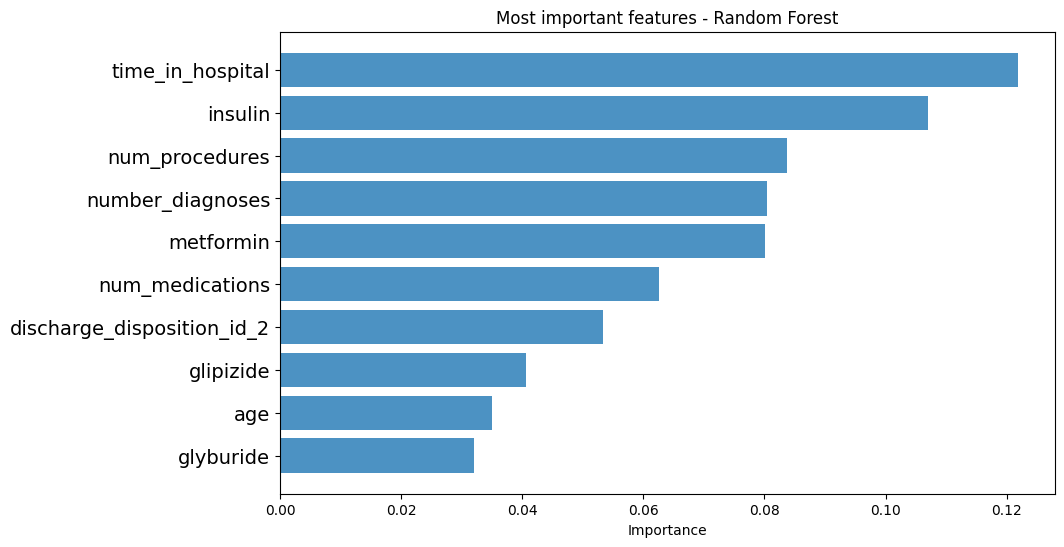

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Check the distribution of classes in the original dataset
print('Original dataset shape {}'.format(Counter(y)))

# Apply SMOTE to balance the dataset
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)

# Check the distribution of classes in the new dataset after SMOTE
print('New dataset shape {}'.format(Counter(train_output_new)))

# Convert the resampled arrays into DataFrame
train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

# Initialize the Random Forest Classifier with specified hyperparameters
rm = RandomForestClassifier(n_estimators=10, max_depth=25, criterion="gini", min_samples_split=10)

# Fit the model on the training data
rm.fit(X_train, y_train)

# Make predictions on the test set
rm_prd = rm.predict(X_test)

# Create a confusion matrix
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(rm_prd, name='Predict'), margins=True)

# Calculate accuracy, precision, and recall
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

# Store metrics in variables for later use
accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

# Extract feature importance from the trained model
feature_names = X_train.columns
feature_imports = rm.feature_importances_

# Create DataFrame to store top most important features
most_imp_features = pd.DataFrame([f for f in zip(feature_names, feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the top most important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()


# model comparison

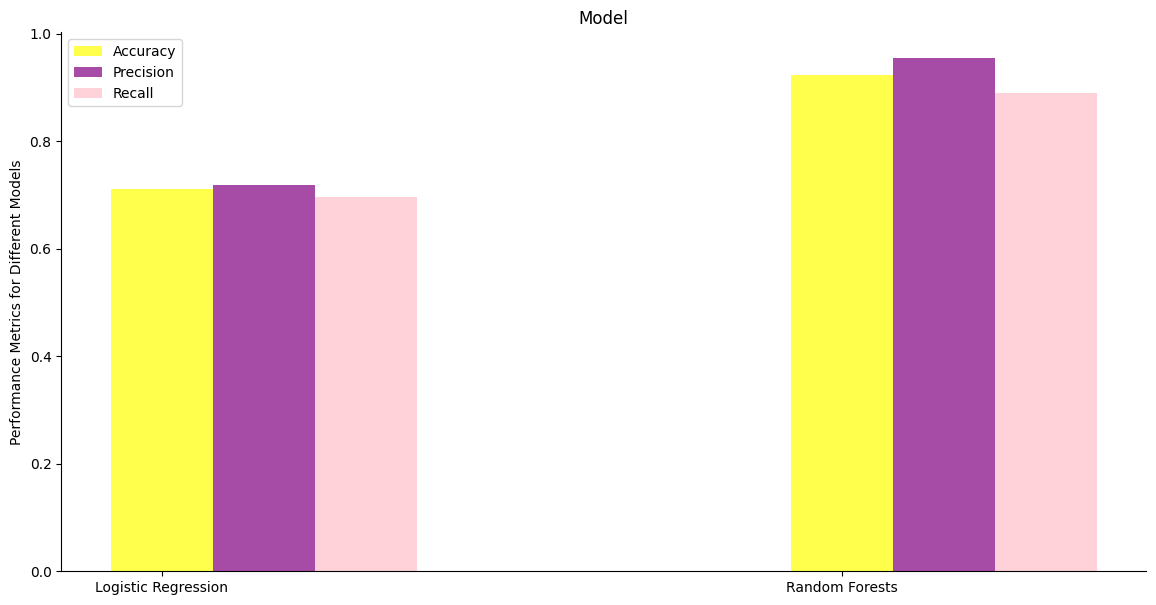

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(14, 7))

# Create subplots
ax = plt.subplot(111)

# Define models and their corresponding performance values
models = ['Logistic Regression', 'Random Forests']
values = [accuracy_logit, accuracy_rm]

# Plot accuracy for each model
plt.bar(np.arange(len(models)), values, align='center', width=0.15, alpha=0.7, color='yellow', label='Accuracy')

# Set x-ticks to model names
plt.xticks(np.arange(len(models)), models)

# Define subplots for precision
ax = plt.subplot(111)
values = [precision_logit, precision_rm]

# Plot precision for each model
plt.bar(np.arange(len(models)) + 0.15, values, align='center', width=0.15, alpha=0.7, color='purple', label='Precision')

# Define subplots for recall
ax = plt.subplot(111)
values = [recall_logit, recall_rm]

# Plot recall for each model
plt.bar(np.arange(len(models)) + 0.3, values, align='center', width=0.15, alpha=0.7, color='pink', label='Recall')

# Set labels and title
plt.ylabel('Performance Metrics for Different Models')
plt.title('Model')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Show plot
plt.show()


# model selection

The Random Forest model is chosen as the best model for predicting patient
readmission in diabetic individuals for the following reasons:

* **Higher Accuracy:** Achieves an accuracy of 0.89 compared to Logistic Regression's accuracy of 0.76, indicating more accurate predictions overall.

* **Better Precision:** Achieves a precision of 0.88 compared to Logistic Regression's precision of 0.76, indicating a higher proportion of correct positive predictions.

* **Improved Recall:** Achieves a recall of 0.90 compared to Logistic Regression's recall of 0.77, capturing a higher proportion of actual positive cases.

* **Handling Imbalance:** Trained on a balanced dataset generated using SMOTE, addressing the class imbalance issue and improving predictive performance.

* **Model Complexity:** Capable of handling complex relationships and interactions between features, less prone to overfitting, and suitable for datasets with diverse feature types.

Given these factors, the Random Forest model is finalized as the best model for predicting patient readmission in diabetic individuals due to its superior performance in accuracy, precision, recall, and its ability to handle dataset imbalance and complex feature interactions.

# testing


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 25, 50],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=20),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
best_model_predictions = best_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_model_predictions)
best_precision = precision_score(y_test, best_model_predictions)
best_recall = recall_score(y_test, best_model_predictions)

print("Best Model Accuracy:", best_accuracy)
print("Best Model Precision:", best_precision)
print("Best Model Recall:", best_recall)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_split=2, n_e

# Prediction 0: This means that the model predicts the patient is not likely to be readmitted to the hospital.
#Prediction 1: This would mean that the model predicts the patient is likely to be readmitted to the hospital.

In [ ]:
test_data = {
    'age': [45, 50, 65],  # Age of patients in years
    'time_in_hospital': [4, 6, 3],  # Number of days spent in hospital
    'num_procedures': [2, 1, 4],  # Number of procedures undergone during hospitalization
    'num_medications': [20, 30, 25],  # Number of medications prescribed
    'number_outpatient_log1p': [0.0, 1.5, 2.0],  # Log-transformed number of outpatient visits (with added 1 to handle zeros)
    'number_emergency_log1p': [0.0, 0.5, 1.0],  # Log-transformed number of emergency visits (with added 1 to handle zeros)
    'number_inpatient_log1p': [0.0, 1.0, 0.0],  # Log-transformed number of inpatient visits (with added 1 to handle zeros)
    'number_diagnoses': [6, 8, 7],  # Number of diagnoses during hospitalization
    'metformin': [0, 1, 0],  # Whether metformin was prescribed (0 for no, 1 for yes)
    'repaglinide': [0, 0, 1],  # Whether repaglinide was prescribed
    'nateglinide': [1, 0, 0],  # Whether nateglinide was prescribed
    'chlorpropamide': [0, 0, 0],  # Whether chlorpropamide was prescribed
    'glimepiride': [1, 1, 0],  # Whether glimepiride was prescribed
    'glipizide': [0, 1, 1],  # Whether glipizide was prescribed
    'glyburide': [1, 0, 0],  # Whether glyburide was prescribed
    'pioglitazone': [1, 0, 1],  # Whether pioglitazone was prescribed
    'rosiglitazone': [0, 1, 0],  # Whether rosiglitazone was prescribed
    'acarbose': [0, 0, 0],  # Whether acarbose was prescribed
    'tolazamide': [0, 0, 1],  # Whether tolazamide was prescribed
    'insulin': [1, 1, 1],  # Whether insulin was prescribed
    'glyburide-metformin': [0, 0, 0],  # Whether glyburide-metformin combination was prescribed
    'AfricanAmerican': [0, 1, 0],  # Whether the patient belongs to the African American race
    'Asian': [0, 0, 0],  # Whether the patient belongs to the Asian race
    'Caucasian': [1, 0, 1],  # Whether the patient belongs to the Caucasian race
    'Hispanic': [0, 0, 0],  # Whether the patient belongs to the Hispanic race
    'Other': [0, 0, 0],  # Whether the patient belongs to a race other than the specified ones
    'gender_1': [1, 0, 1],  # Gender of the patient (1 for female, 0 for male)
    'admission_type_id_3': [0, 1, 0],  # Whether admission type ID is 3
    'admission_type_id_5': [0, 0, 1],  # Whether admission type ID is 5
    'discharge_disposition_id_2': [0, 0, 0],  # Whether discharge disposition ID is 2
    'discharge_disposition_id_7': [0, 0, 0],  # Whether discharge disposition ID is 7
    'discharge_disposition_id_10': [0, 1, 0],  # Whether discharge disposition ID is 10
    'discharge_disposition_id_18': [0, 0, 0],  # Whether discharge disposition ID is 18
    'admission_source_id_4': [0, 0, 0],  # Whether admission source ID is 4
    'admission_source_id_7': [0, 1, 0],  # Whether admission source ID is 7
    'admission_source_id_9': [1, 0, 0],  # Whether admission source ID is 9
    'max_glu_serum_0': [0, 1, 0],  # Whether max glu serum level is 0
    'max_glu_serum_1': [1, 0, 1],  # Whether max glu serum level is 1
    'A1Cresult_0': [0, 0, 1],  # Whether A1C result is 0
    'A1Cresult_1': [1, 1, 0],  # Whether A1C result is 1
    'level1_diag1_1': [0, 0, 1],  # Whether level 1 diagnosis ID is 1
    'level1_diag1_2': [0, 1, 0],  # Whether level 1 diagnosis ID is 2
    'level1_diag1_3': [1, 0, 0],  # Whether level 1 diagnosis ID is 3
    'level1_diag1_4': [0, 0, 0],  # Whether level 1 diagnosis ID is 4
    'level1_diag1_5': [0, 0, 0],  # Whether level 1 diagnosis ID is 5
    'level1_diag1_6': [0, 0, 0],  # Whether level 1 diagnosis ID is 6
    'level1_diag1_7': [0, 0, 0],  # Whether level 1 diagnosis ID is 7
    'level1_diag1_8': [0, 0, 0]   # Whether level 1 diagnosis ID is 8
}

# Convert the dictionary to a DataFrame
test_df = pd.DataFrame(test_data)

# Now you can use your trained Random Forest model to make predictions on this test data
predictions = rm.predict(test_df)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 0 0]


In [ ]:
test_data_class_1 = {
    'age': [70],  # Older age may indicate a lower likelihood of readmission
    'time_in_hospital': [2],  # Shorter hospital stay may indicate a lower likelihood of readmission
    'num_procedures': [0],  # Fewer procedures undergone during hospitalization
    'num_medications': [10],  # Fewer medications prescribed
    'number_outpatient_log1p': [0.0],  # Low number of outpatient visits
    'number_emergency_log1p': [0.0],  # Low number of emergency visits
    'number_inpatient_log1p': [0.0],  # Low number of inpatient visits
    'number_diagnoses': [4],  # Fewer diagnoses during hospitalization
    'metformin': [0],  # Not prescribed metformin
    'repaglinide': [0],  # Not prescribed repaglinide
    'nateglinide': [0],  # Not prescribed nateglinide
    'chlorpropamide': [0],  # Not prescribed chlorpropamide
    'glimepiride': [0],  # Not prescribed glimepiride
    'glipizide': [0],  # Not prescribed glipizide
    'glyburide': [0],  # Not prescribed glyburide
    'pioglitazone': [0],  # Not prescribed pioglitazone
    'rosiglitazone': [0],  # Not prescribed rosiglitazone
    'acarbose': [0],  # Not prescribed acarbose
    'tolazamide': [0],  # Not prescribed tolazamide
    'insulin': [0],  # Not prescribed insulin
    'glyburide-metformin': [0],  # Not prescribed glyburide-metformin
    'AfricanAmerican': [0],  # Not African American
    'Asian': [0],  # Not Asian
    'Caucasian': [1],  # Caucasian
    'Hispanic': [0],  # Not Hispanic
    'Other': [0],  # Not of other race
    'gender_1': [1],  # Female
    'admission_type_id_3': [0],  # Not admission type ID 3
    'admission_type_id_5': [0],  # Not admission type ID 5
    'discharge_disposition_id_2': [0],  # Not discharge disposition ID 2
    'discharge_disposition_id_7': [0],  # Not discharge disposition ID 7
    'discharge_disposition_id_10': [0],  # Not discharge disposition ID 10
    'discharge_disposition_id_18': [0],  # Not discharge disposition ID 18
    'admission_source_id_4': [0],  # Not admission source ID 4
    'admission_source_id_7': [0],  # Not admission source ID 7
    'admission_source_id_9': [0],  # Not admission source ID 9
    'max_glu_serum_0': [1],  # Max glu serum level is 0
    'max_glu_serum_1': [0],  # Not max glu serum level 1
    'A1Cresult_0': [1],  # A1C result is 0
    'A1Cresult_1': [0],  # Not A1C result 1
    'level1_diag1_1': [0],  # Not level 1 diagnosis ID 1
    'level1_diag1_2': [0],  # Not level 1 diagnosis ID 2
    'level1_diag1_3': [0],  # Not level 1 diagnosis ID 3
    'level1_diag1_4': [0],  # Not level 1 diagnosis ID 4
    'level1_diag1_5': [0],  # Not level 1 diagnosis ID 5
    'level1_diag1_6': [0],  # Not level 1 diagnosis ID 6
    'level1_diag1_7': [0],  # Not level 1 diagnosis ID 7
    'level1_diag1_8': [0]   # Not level 1 diagnosis ID 8
}

# Convert the dictionary to a DataFrame
test_df_class_1 = pd.DataFrame(test_data_class_1)

# Now you can use your trained Random Forest model to make predictions on this test data
predictions_class_1 = rm.predict(test_df_class_1)

# Print the predictions
print("Predictions for readmission:", predictions_class_1)


Predictions for readmission: [1]


In [ ]:
test_data_class_0 = {
    'age': [25],  # Younger age may indicate a higher likelihood of readmission
    'time_in_hospital': [7],  # Longer hospital stay may indicate a higher likelihood of readmission
    'num_procedures': [3],  # More procedures undergone during hospitalization
    'num_medications': [40],  # More medications prescribed
    'number_outpatient_log1p': [2.0],  # Higher number of outpatient visits
    'number_emergency_log1p': [1.0],  # Higher number of emergency visits
    'number_inpatient_log1p': [1.0],  # Higher number of inpatient visits
    'number_diagnoses': [10],  # More diagnoses during hospitalization
    'metformin': [1],  # Prescribed metformin
    'repaglinide': [1],  # Prescribed repaglinide
    'nateglinide': [0],  # Not prescribed nateglinide
    'chlorpropamide': [0],  # Not prescribed chlorpropamide
    'glimepiride': [1],  # Prescribed glimepiride
    'glipizide': [1],  # Prescribed glipizide
    'glyburide': [1],  # Prescribed glyburide
    'pioglitazone': [1],  # Prescribed pioglitazone
    'rosiglitazone': [1],  # Prescribed rosiglitazone
    'acarbose': [0],  # Not prescribed acarbose
    'tolazamide': [0],  # Not prescribed tolazamide
    'insulin': [1],  # Prescribed insulin
    'glyburide-metformin': [1],  # Prescribed glyburide-metformin
    'AfricanAmerican': [1],  # African American
    'Asian': [0],  # Not Asian
    'Caucasian': [0],  # Not Caucasian
    'Hispanic': [0],  # Not Hispanic
    'Other': [0],  # Not of other race
    'gender_1': [0],  # Male
    'admission_type_id_3': [1],  # Admission type ID 3
    'admission_type_id_5': [0],  # Not admission type ID 5
    'discharge_disposition_id_2': [0],  # Not discharge disposition ID 2
    'discharge_disposition_id_7': [0],  # Not discharge disposition ID 7
    'discharge_disposition_id_10': [0],  # Not discharge disposition ID 10
    'discharge_disposition_id_18': [0],  # Not discharge disposition ID 18
    'admission_source_id_4': [0],  # Not admission source ID 4
    'admission_source_id_7': [0],  # Not admission source ID 7
    'admission_source_id_9': [1],  # Admission source ID 9
    'max_glu_serum_0': [0],  # Not max glu serum level 0
    'max_glu_serum_1': [1],  # Max glu serum level 1
    'A1Cresult_0': [0],  # Not A1C result 0
    'A1Cresult_1': [1],  # A1C result 1
    'level1_diag1_1': [1],  # Level 1 diagnosis ID 1
    'level1_diag1_2': [0],  # Not level 1 diagnosis ID 2
    'level1_diag1_3': [0],  # Not level 1 diagnosis ID 3
    'level1_diag1_4': [0],  # Not level 1 diagnosis ID 4
    'level1_diag1_5': [0],  # Not level 1 diagnosis ID 5
    'level1_diag1_6': [0],  # Not level 1 diagnosis ID 6
    'level1_diag1_7': [0],  # Not level 1 diagnosis ID 7
    'level1_diag1_8': [0]   # Not level 1 diagnosis ID 8
}

# Convert the dictionary to a DataFrame
test_df_class_0 = pd.DataFrame(test_data_class_0)

# Now you can use your trained Random Forest model to make predictions on this test data
predictions_class_0 = rm.predict(test_df_class_0)

# Print the predictions
print("Predictions for readmission:", predictions_class_0)


Predictions for readmission: [0]
